In [1]:
!pip install criticalpath

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for criticalpath: filename=criticalpath-0.1.5-py3-none-any.whl size=12027 sha256=824393eec20621e131e369116fd474b1202f9f332362f74f7f625b5cb6da43ca
  Stored in directory: /root/.cache/pip/wheels/cd/48/07/ead88c1969e7d36a113558364b0e8fc7590f2d7c85481a6dde
Successfully built criticalpath


In [3]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import networkx as nx
from criticalpath import Node
import plotly.express as px
from IPython.display import Image

In [5]:
# set up the tasks:
a = 5; #no of working days
tasks = [("A", {"Duration": 4*a}), # a list of tuples
         ("B", {"Duration": 2*a}), 
         ("C", {"Duration": 3*a}), 
         ("D", {"Duration": 2*a}), 
         ("E", {"Duration": 2*a}),
         ("F", {"Duration": 2*a}),
         ("G", {"Duration": 2*a}),
         ("H", {"Duration": 2*a}),
         ("I", {"Duration": 2*a}),
         ("J", {"Duration": 8*a}),
         ("K", {"Duration": 4*a}),
         ("L", {"Duration": 5*a}),
         ("M", {"Duration": 2*a}),
         ("N", {"Duration": 8*a}),
         ("O", {"Duration": 4*a}),
         ("P", {"Duration": 4*a}),
         ("Q", {"Duration": 4*a}),
         ("R", {"Duration": 4*a}),
         ("S", {"Duration": 4*a}),
         ("T", {"Duration": 4*a})]

# set up the dependencies along all paths:
dependencies = [("A", "B"), # B depends on A
                ("B", "C"),
                ("C", "D"),
                ("C", "E"),
                ("C", "F"),
                ("C", "G"),
                ("C", "H"),
                ("C", "I"),
                ("C", "J"),
                ("C", "M"),
                ("D", "E"),
                ("D", "I"),
                ("D", "K"),
                ("E", "F"),
                ("E", "I"),
                ("E", "K"),
                ("F", "G"),
                ("F", "I"),
                ("F", "K"),
                ("G", "H"),
                ("G", "I"),
                ("G", "K"),
                ("G", "L"),
                ("H", "I"),
                ("H", "K"),
                ("H", "L"),
                ("I", "J"),
                ("I", "K"),
                ("I", "L"),
                ("I", "M"),
                ("I", "N"),
                ("J", "M"),
                ("J", "O"),
                ("J", "P"),
                ("J", "Q"),
                ("J", "R"),
                ("J", "S"),
                ("K", "S"),
                ("L", "O"),
                ("L", "S"),
                ("L", "N"),
                ("L", "O"),
                ("M", "O"),
                ("M", "P"),
                ("M", "S"),
                ("N", "O"),
                ("N", "P"),
                ("N", "S"),
                ("O", "P"),
                ("O", "R"),
                ("O", "S"),
                ("P", "Q"),
                ("P", "R"),
                ("P", "S"),
                ("Q", "R"),
                ("Q", "S"),
                ("R", "S"),
                ("S", "T")]

# initialize (directed) graph
G = nx.DiGraph() 

# add tasks and dependencies (edges)
G.add_nodes_from(tasks)
G.add_edges_from(dependencies)

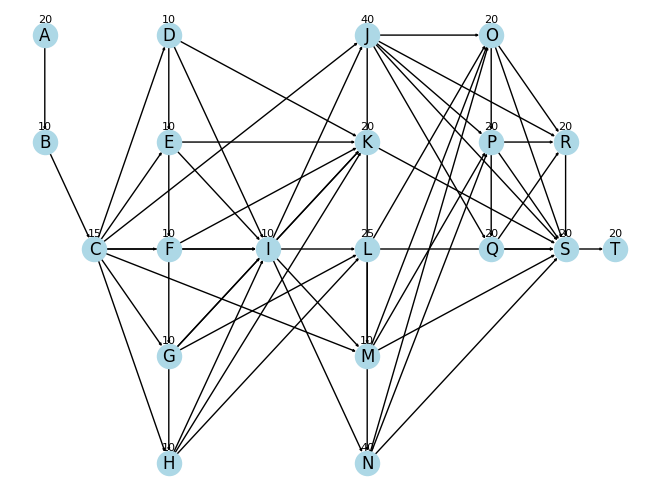

In [6]:
# set up the (arbitrary) positions of the tasks (nodes):
pos_nodes = {"A": (-4, 4), 
             "B": (-4, 3), 
             "C": (-2, 2), 
             "D": (1, 4), 
             "E": (1, 3),
             "F": (1, 2),
             "G": (1, 1),
             "H": (1, 0),
             "I": (5, 2),
             "J": (9, 4),
             "K": (9, 3),
             "L": (9, 2),
             "M": (9, 1),
             "N": (9, 0),
             "O": (14, 4),
             "P": (14, 3),
             "Q": (14, 2),
             "R": (17, 3),
             "S": (17, 2),
             "T": (19, 2)}

# draw the nodes
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=3)


# set up the (arbitrary) positions of the durations labels (attributes):
pos_attrs = {node:(coord[0], coord[1] + 0.1) for node, coord in pos_nodes.items()}
attrs = nx.get_node_attributes(G, 'Duration')

# draw (write) the node attributes (duration)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=8, verticalalignment='bottom', clip_on=False)


# set a little margin (padding) for the graph so the labels are not cut off
plt.margins(0.01)

## Criticalpath package

In [7]:
# initialize a "project":
proj = Node('Project')

# load the tasks and their durations:
for t in tasks:
    proj.add(Node(t[0], duration=t[1]["Duration"])) # (name of the node, access the duration field of the object)

# load the dependencies (or sequence):
for d in dependencies:
    proj.link(d[0],d[1])

# update the "project":
proj.update_all()

In [8]:
# proj.get_critical_path() will return a list of nodes
# however, we want to store them as strings so that they can be easily used for visualization later
crit_path = [str(n) for n in proj.get_critical_path()]

# get the current duration of the project
proj_duration = proj.duration

print(f"The current critical path is: {crit_path}")
print(">"*50)
print(f"The current project duration is: {proj_duration} days")

The current critical path is: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The current project duration is: 290 days


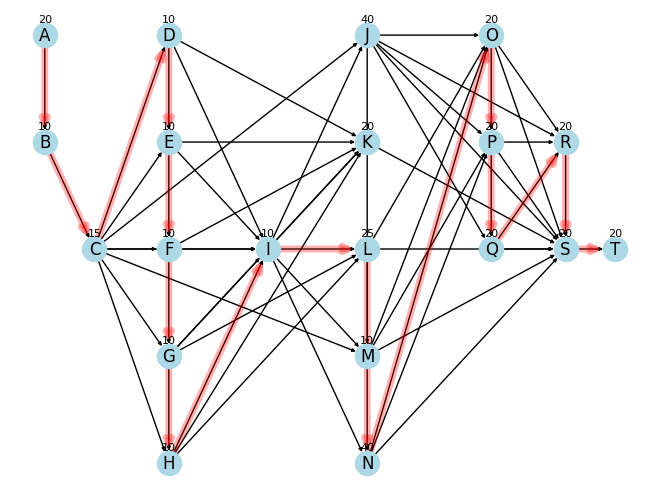

In [9]:
# create a list of edges using the current critical path list:
crit_edges = [(n, crit_path[i+1]) for i, n in enumerate(crit_path[:-1])] # [(node in CP, its successor)]
#print(crit_edges) # [('B', 'C'), ('C', 'E')]

# first, recreate the network visualization:
nx.draw(G, with_labels=True, pos=pos_nodes, node_color='lightblue', arrowsize=5)
nx.draw_networkx_labels(G, pos=pos_attrs, labels=attrs, font_size=8, verticalalignment='bottom')

# now add the critical path as an additional layer on top of the original graph:
nx.draw_networkx_edges(G, pos=pos_nodes, edgelist=crit_edges, width=5, alpha=0.3, edge_color='r')
# Draws the edges only

# again, leaving some margin so the labels are not cut off
plt.margins(0.01)

An example showing the power of pandas and plotly. Results are correct, but the procedure is oversimplified ("correct" order of tasks in list is assumed)

In [10]:
from datetime import date

proj_startdate = date.today()

proj_schedule = pd.DataFrame([dict(Task = key, 
                                   Start = datetime.date.fromisoformat("2023-01-01"), 
                                   Finish = datetime.date.fromisoformat("2023-01-01") + datetime.timedelta(val['Duration']), 
                                   Status = 'NA')
                              for key, val in dict(tasks).items()])
# One dictionary for each line (sample)

for key, val in dict(tasks).items():
    #dep = [d for d in dependencies if d[1] == key] # all the dependencies to be paid by this task
    #prev_tasks = [t[0] for t in dep] # all the tasks on which this task depends
    prev_tasks = [d[0] for d in dependencies if d[1] == key] #
    if prev_tasks:
        prev_finish = proj_schedule[proj_schedule.Task.isin(prev_tasks)]['Finish'].max() # very powerful isin column => dataframe
        proj_schedule.loc[proj_schedule.Task == key, 'Start'] = prev_finish
        proj_schedule.loc[proj_schedule.Task == key, 'Finish'] = prev_finish + datetime.timedelta(val['Duration'])
        
proj_schedule.loc[proj_schedule.Task.isin(crit_path), 'Status'] = 'Critical Path'
        
display(proj_schedule)

,Task,Start,Finish,Status
0,A,2023-01-01,2023-01-21,Critical Path
1,B,2023-01-21,2023-01-31,Critical Path
2,C,2023-01-31,2023-02-15,Critical Path
3,D,2023-02-15,2023-02-25,Critical Path
4,E,2023-02-25,2023-03-07,Critical Path
5,F,2023-03-07,2023-03-17,Critical Path
6,G,2023-03-17,2023-03-27,Critical Path
7,H,2023-03-27,2023-04-06,Critical Path
8,I,2023-04-06,2023-04-16,Critical Path
9,J,2023-04-16,2023-05-26,NA


In [11]:
import kaleido
fig = px.timeline(proj_schedule, x_start="Start", x_end="Finish", y="Task", color="Status") # by plotly.express
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
